###    Часть первая. 1. Описание структуры исходных данных и задачи в терминах предметной области и машинного обучения

    Задача относится к области сельского хозйства. Данные представляют собой набор характеристик трех различных сортов пшеницы (Kama, Rosa и Canadian) по 70 элементов каждого вида в выборке. Визуализация внутренней структуры зерна была проведена при помощи техники мягкого рентгеновского излучения. Изображения структуры зерен были сохранены на рентгеновские пластины Kodak. Зерна пшеницы были получены с экспериментальных полей Института Агрофизики Польской Академии Наук (г. Люблин).
    

### Формальное описание задачи в терминах машинного обучения

Задачей является: разработать алгоритм классификации зерен пшеницы трех сортов (Kama, Rosa и Canadian) на основе семи параметров измерений зерна.

#### Класс задачи: задача классификации.

#### Исходные прзнаки:

 1. Поверхность (A) 
 2. Периметр (P) 
 3. Компактность (C = 4*pi*A/P^2) 
 4. Длинна зерна 
 5. Ширина зерна 
 6. Коэфициент ассиметрии 
 7. Длинна бороздки зерна
 

#### Целевая переменная

Сорт зерна
1. Cama
2. Rosa
3. Canadian

### 2. Результаты предварительного анализа и визуализации исходных признаков и целевой переменной

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Загрузка данных

In [2]:
df = pd.read_csv("seeds_dataset.txt", sep='\t', header=None)

In [3]:
df.head(10)

0      1       2      3      4      5      6  7
0  15.26  14.84   0.871  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09   0.905  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
5  14.38  14.21  0.8951  5.386  3.312  2.462  4.956  1
6  14.69  14.49  0.8799  5.563  3.259  3.586  5.219  1
7  14.11  14.10  0.8911  5.420  3.302  2.700  5.000  1
8  16.63  15.46       ?  6.053  3.465  2.040  5.877  1
9  16.44  15.25   0.888  5.884  3.505  1.969  5.533  1

In [4]:
# переименуем названия колонок
df.columns = ["Area", "Perimeter", "Compactness", "Kernel_length",\
              "Kernel_width", "Assimetry", "Groove_length",\
              "Class"]
features = ["Area", "Perimeter", "Compactness", "Kernel_length",\
              "Kernel_width", "Assimetry", "Groove_length"]

In [5]:
df.shape

(210, 8)

In [6]:
# информация по датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
Area             210 non-null float64
Perimeter        210 non-null float64
Compactness      210 non-null object
Kernel_length    210 non-null float64
Kernel_width     210 non-null object
Assimetry        210 non-null float64
Groove_length    210 non-null float64
Class            210 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 13.2+ KB


##### Все признаки представленны вещественными переменными
##### Классы: три дискретных класса
##### Тип данных Object в признаках Compactness и Kernel_width наводит на мысль о пропущенных данных (NaN)

In [7]:
df.describe()

Area   Perimeter  Kernel_length   Assimetry  Groove_length  \
count  210.000000  210.000000     210.000000  210.000000     210.000000   
mean    14.847524   14.559286       5.628533    3.700201       5.408071   
std      2.909699    1.305959       0.443063    1.503557       0.491480   
min     10.590000   12.410000       4.899000    0.765100       4.519000   
25%     12.270000   13.450000       5.262250    2.561500       5.045000   
50%     14.355000   14.320000       5.523500    3.599000       5.223000   
75%     17.305000   15.715000       5.979750    4.768750       5.877000   
max     21.180000   17.250000       6.675000    8.456000       6.550000   

            Class  
count  210.000000  
mean     2.000000  
std      0.818448  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

##### Некоторые данные в признаках Compactness и Kernel_width заменены на знаки вопроса, найдем и заменим их.

In [8]:
df["Compactness"].value_counts()
# 3 вопроса (1,4%)

0.8823    3
?         3
0.8648    2
0.8977    2
0.8779    2
0.9077    2
0.8883    2
0.8763    2
0.859     2
0.8726    2
0.8811    2
0.8558    2
0.8923    2
0.8198    2
0.8786    2
0.8849    2
0.888     2
0.8722    2
0.882     2
0.8993    2
0.8706    2
0.868     2
0.8658    2
0.8716    2
0.8462    1
0.8491    1
0.8759    1
0.848     1
0.9031    1
0.8818    1
         ..
0.8664    1
0.9       1
0.8256    1
0.8538    1
0.8944    1
0.8443    1
0.8985    1
0.8676    1
0.8734    1
0.8637    1
0.8594    1
0.8686    1
0.878     1
0.8991    1
0.8955    1
0.8652    1
0.8372    1
0.8455    1
0.9058    1
0.8906    1
0.8521    1
0.884     1
0.839     1
0.8999    1
0.8453    1
0.9066    1
0.8795    1
0.871     1
0.8831    1
0.8879    1
Name: Compactness, Length: 184, dtype: int64

In [9]:
df["Kernel_width"].value_counts()
# 4 вопроса(1,9%)

?        4
3.026    3
2.81     2
2.967    2
2.821    2
3.199    2
3.158    2
3.156    2
2.975    2
3.312    2
2.911    2
3.755    2
3.377    2
3.857    2
2.763    2
2.675    2
2.879    2
3.155    2
3.485    2
3.594    2
3.465    2
3.769    2
3.333    2
2.85     2
3.201    2
2.804    1
3.869    1
2.701    1
3.042    1
2.847    1
        ..
3.396    1
3.259    1
3.864    1
3.512    1
3.212    1
3.69     1
3.129    1
3.466    1
3.796    1
3.991    1
3.302    1
3.379    1
2.787    1
2.936    1
3.785    1
3.464    1
2.882    1
3.017    1
3.582    1
3.054    1
3.815    1
3.472    1
3.552    1
2.981    1
3.683    1
3.412    1
3.719    1
3.486    1
3.902    1
3.791    1
Name: Kernel_width, Length: 182, dtype: int64

In [10]:
df[df["Compactness"] != '?']["Compactness"].value_counts()

0.8823    3
0.8648    2
0.8977    2
0.8779    2
0.9077    2
0.8883    2
0.8763    2
0.859     2
0.8726    2
0.8811    2
0.8558    2
0.8923    2
0.8198    2
0.8786    2
0.8849    2
0.888     2
0.8716    2
0.882     2
0.868     2
0.8706    2
0.8722    2
0.8993    2
0.8658    2
0.8613    1
0.8462    1
0.8491    1
0.8759    1
0.8984    1
0.9031    1
0.848     1
         ..
0.8673    1
0.8664    1
0.8256    1
0.8684    1
0.8538    1
0.8944    1
0.8443    1
0.8985    1
0.881     1
0.8686    1
0.8594    1
0.8831    1
0.878     1
0.8991    1
0.8955    1
0.8652    1
0.8735    1
0.8372    1
0.8455    1
0.9058    1
0.8906    1
0.8521    1
0.884     1
0.839     1
0.8999    1
0.8453    1
0.9066    1
0.8795    1
0.871     1
0.8879    1
Name: Compactness, Length: 183, dtype: int64

In [11]:
df[df["Kernel_width"] != '?']["Kernel_width"].value_counts().min()


1

In [12]:
# значение 10 не встречается в обеих подгруппах, заменим им вопросы.
d = {'?':10}
df[["Compactness", "Kernel_width"]] = df[["Compactness", "Kernel_width"]].\
    replace(d).astype('float')

##### Построим гистограммы исходных признаков

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b949e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10bce95c0>]], dtype=object)

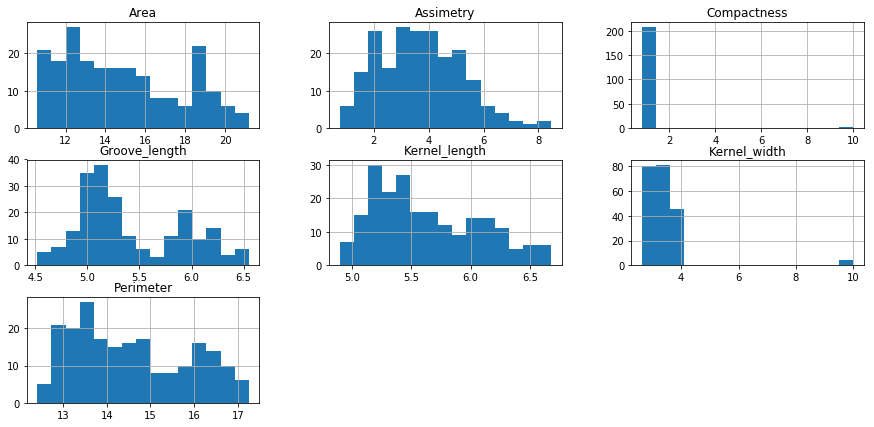

In [13]:
df[features].hist(bins=15, figsize=(15,7))

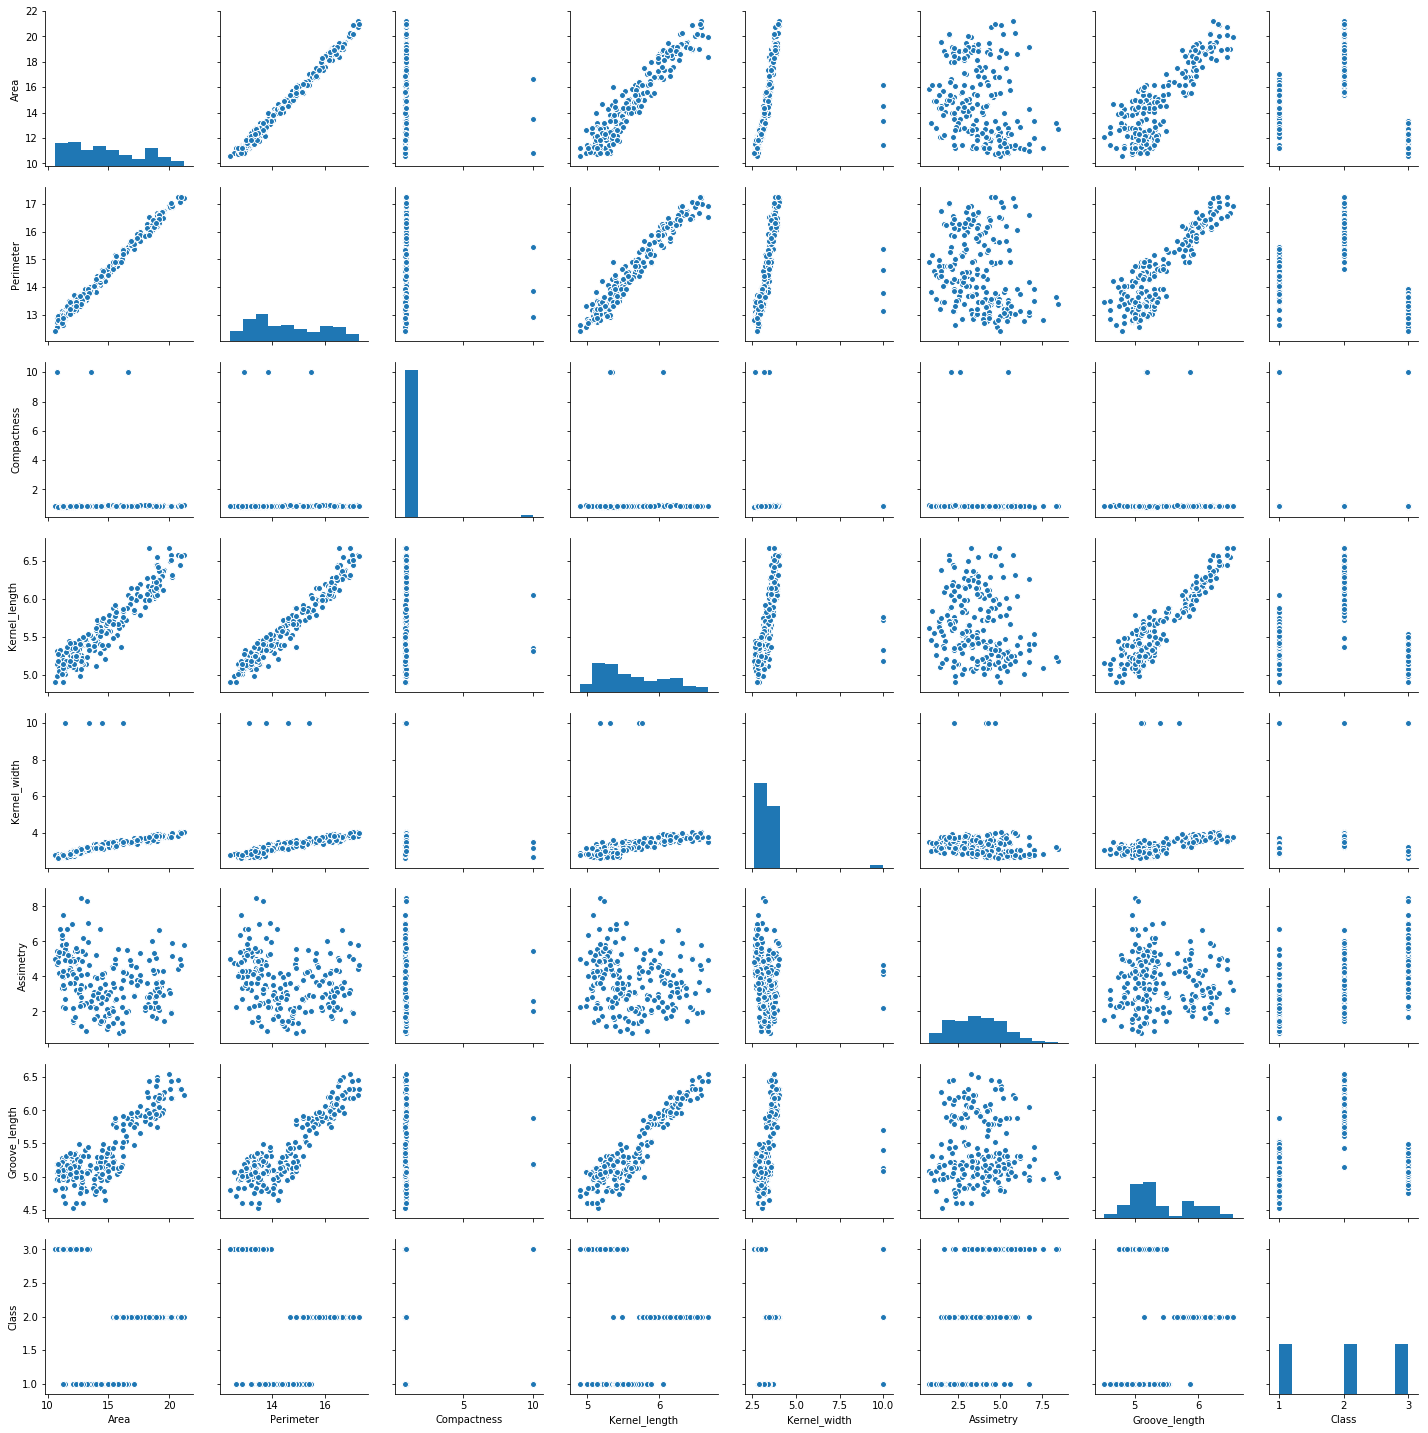

In [14]:
# на вскидку оценим взаимоотношения признаков
sns.pairplot(df) 

### Проанализируем целевую переменную.

In [15]:
df["Class"].describe()

count    210.000000
mean       2.000000
std        0.818448
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Class, dtype: float64

3    70
2    70
1    70
Name: Class, dtype: int64


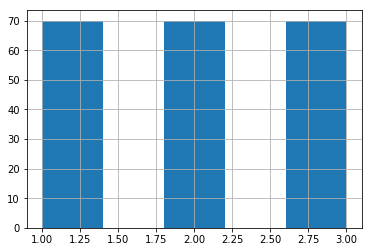

In [16]:
df["Class"].hist(bins=5)
print(df["Class"].value_counts())

##### Классы полностью сбалансированы

### Корреляционный анализ

                   Area  Perimeter  Compactness  Kernel_length  Kernel_width  \
Area           1.000000   0.994341    -0.036631       0.949985      0.320455   
Perimeter      0.994341   1.000000    -0.033068       0.972422      0.321358   
Compactness   -0.036631  -0.033068     1.000000      -0.007366     -0.031957   
Kernel_length  0.949985   0.972422    -0.007366       1.000000      0.283415   
Kernel_width   0.320455   0.321358    -0.031957       0.283415      1.000000   
Assimetry     -0.229572  -0.217340    -0.033887      -0.171562     -0.089385   
Groove_length  0.863693   0.890784     0.006865       0.932806      0.261221   
Class         -0.346058  -0.327900    -0.060259      -0.257269     -0.117862   

               Assimetry  Groove_length     Class  
Area           -0.229572       0.863693 -0.346058  
Perimeter      -0.217340       0.890784 -0.327900  
Compactness    -0.033887       0.006865 -0.060259  
Kernel_length  -0.171562       0.932806 -0.257269  
Kernel_width   -0.0

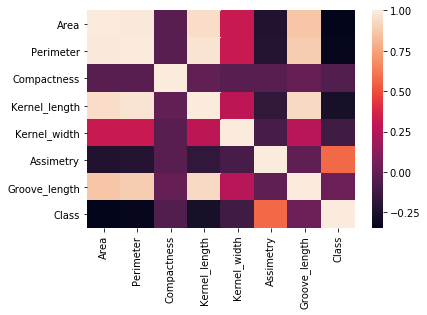

In [17]:
print(df.corr())
sns.heatmap(df.corr())

##### Площадь, периметр, длина зерна и длина бороздки имееют прямую зависимость

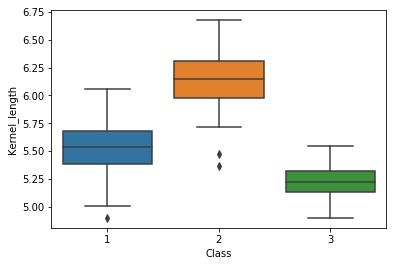

In [18]:
sns.boxplot(x="Class", y="Kernel_length", data=df[["Class","Kernel_length"]],\
           orient='v')

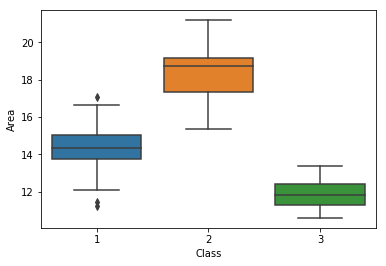

In [19]:
sns.boxplot(x="Class", y="Area", data=df[["Class","Area"]],orient='v')

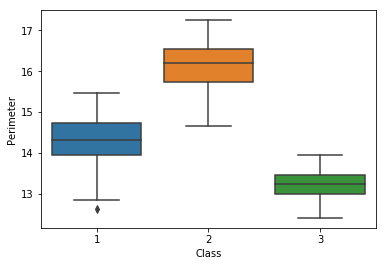

In [20]:
sns.boxplot(x="Class", y="Perimeter", data=df[["Class","Perimeter"]],orient='v')

##### Площадь, периметр и длина зерна лучше всего делят данные на классы

## 3. Подготовка данных

In [14]:
X = df[features]
y = df['Class']

## 4. Обучение и тестирование моделей

In [15]:
random_state = 11

### Критерии расщепления

In [23]:
criteria = ['gini', 'entropy']

for cr in criteria:
    clf = DecisionTreeClassifier(criterion=cr, random_state=random_state)
    scores = cross_val_score(clf, X, y, cv=5)
    print('Criterion: {}, accuracy score: {}'.format(cr, scores.mean()))

Criterion: gini, accuracy score: 0.8952380952380953
Criterion: entropy, accuracy score: 0.9142857142857143


##### Результаты не очень высокие, лучший критерий - энтропия

### Количество признаков (max_features)

In [24]:
max_features = list(range(2, 8))

for mf in max_features:
    clf = DecisionTreeClassifier(criterion="entropy",\
                                 random_state=random_state,\
                                max_features=mf)
    scores = cross_val_score(clf, X, y, cv=5)
    print('Max_features: {}, accuracy score: {}'.format(mf, scores.mean()))

Max_features: 2, accuracy score: 0.8571428571428573
Max_features: 3, accuracy score: 0.8761904761904763
Max_features: 4, accuracy score: 0.8952380952380953
Max_features: 5, accuracy score: 0.8952380952380953
Max_features: 6, accuracy score: 0.8761904761904761
Max_features: 7, accuracy score: 0.9142857142857143


##### Лучший результат при использовании всех признаков. Оптимально = 7

### Глубина дерева (max_depth)

Max_depth: 2, accuracy score: 0.8904761904761905
Max_depth: 3, accuracy score: 0.8761904761904761
Max_depth: 4, accuracy score: 0.8809523809523808
Max_depth: 5, accuracy score: 0.9
Max_depth: 6, accuracy score: 0.9095238095238095
Max_depth: 7, accuracy score: 0.9142857142857143
Max_depth: 8, accuracy score: 0.9142857142857143
Max_depth: 9, accuracy score: 0.9142857142857143
Max_depth: 10, accuracy score: 0.9142857142857143
Max_depth: 11, accuracy score: 0.9142857142857143
Max_depth: 12, accuracy score: 0.9142857142857143
Max_depth: 13, accuracy score: 0.9142857142857143
Max_depth: 14, accuracy score: 0.9142857142857143
Max_depth: 15, accuracy score: 0.9142857142857143
Max_depth: 16, accuracy score: 0.9142857142857143
Max_depth: 17, accuracy score: 0.9142857142857143
Max_depth: 18, accuracy score: 0.9142857142857143
Max_depth: 19, accuracy score: 0.9142857142857143


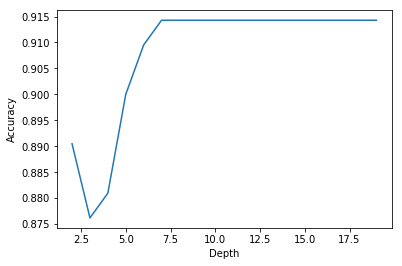

In [25]:
max_depth = list(range(2,20))
scoring = []

for md in max_depth:
    clf = DecisionTreeClassifier(criterion="entropy",\
                                 random_state=random_state, max_depth=md)
    scores = cross_val_score(clf, X, y, cv=5)
    scoring.append(scores.mean())
    print("Max_depth: {}, accuracy score: {}".format(md, scores.mean()))
    
plt.plot(max_depth, scoring)
plt.xlabel('Depth')
plt.ylabel('Accuracy')

Оптимальная глубина = 7

In [91]:
clf = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=7,
                             max_features=7,
                             random_state=random_state)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.91428571428571426

# 5. Визуализация ДР

In [ ]:
from sklearn.tree import export_graphviz

In [26]:
for depth in [3,7]:
    clf = DecisionTreeClassifier(criterion='entropy', max_features=7, max_depth=depth, random_state=random_state)
    clf.fit(X, y)
    export_graphviz(clf, out_file='tree{}.dot'.format(depth))

In [27]:
!dot -Tpng tree3.dot -o tree3.png
!dot -Tpng tree7.dot -o tree7.png

#### Сравним еще и с методом логистической регрессии, которая должна оптимально подходить для наших данных

In [27]:
# logistic regression
lr_clf = LogisticRegressionCV(cv=5, penalty='l1', solver="liblinear", class_weight="balanced",\
                              random_state=random_state)

In [28]:
model = lr_clf.fit(X, y)

In [29]:
model.score(X,y) # считает среднее значение model.predict(X) 

0.98571428571428577

In [30]:
scores = cross_val_score(model, X, y, cv=5)
scores.mean()

0.9571428571428573

## Выводы

Проведен анализ задачи классификации и решение ее с использованием метода машинного обучения деревья решений.
Входные данные (признаки) полностью числовые с минимальными пропусками в данных (не более 2%).
При первичном анализе выделены признаки, которые оптимально делили данные на классы (площадь, периметр и длина зерна).
Проведено пробное построение деревьев решений с использованием различных параметров. Лучший результат показало дерево,
в котором использованы следующие параметры: критерий - энтропия, максимальной число признаков - 7, максимальная глубина дерева - 7.
При выбранных параметрах достигнута точность классификации - 0.914.
Кроме деревьев решений для сравнения использован метод решения задач классификации: логистическая регрессия. Этот метод был выбран с учетом картины входящих данных (небольшое количество признаков и тип принаков - вещественные). Со стандартными методами оптимизации и регуляризации достигнута высокая точность классификации - 0.957. Значение model.score больше чем cros_val_score.mean, потому что несмортря на то, что классификатор использовал кросс-валидацию, обучение модели (fit) в итоге дает нам лучшие из полученных весов. Метод model.score считает среднее значение model.predict(X) по отношению к y и значит находит score при использовании лучшего веса. cros_val_score же считает среднее всех score полученных при кросс-валидации. 

## Часть вторая

### RandomForest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [45]:
# настройки по умолчанию
rfc = RandomForestClassifier(n_estimators=50,
                             random_state=random_state)
score = cross_val_score(rfc, X, y, cv=5, n_jobs=-1)
score.mean()

0.88571428571428579

#### Фиксируем количество деревьев (50) и проверям оптимальное значение признаков (max_features)

Max features: 2, accuracy score: 0.8857
Max features: 3, accuracy score: 0.9000
Max features: 4, accuracy score: 0.9000
Max features: 5, accuracy score: 0.9238
Max features: 6, accuracy score: 0.9190
Max features: 7, accuracy score: 0.9143
Max accuracy during testing: 0.9762


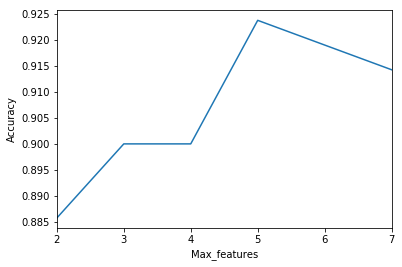

In [36]:
mf = range(2,8)
scores = []
scoring = []
for max_features in mf:
    rfc = RandomForestClassifier(n_estimators=50, max_features=max_features, random_state=random_state)
    score = cross_val_score(rfc, X, y, cv=5, n_jobs=-1)
    scores.append(score)
    scoring.append(score.mean())
    print('Max features: {}, accuracy score: {:.4f}'.format(max_features, score.mean()))
scores = np.asarray(scores).ravel()
print("Max accuracy during testing: {:.4f}".format(max(scores)))
plt.plot(mf, scoring)
plt.xlabel("Max_features")
plt.xlim((2,7))
plt.ylabel("Accuracy")

Оптимальный выбор значения max_features - 5.

#### Проверяем оптималььное значение для аргумента min_samples_leaf (минимальное количество сэмплов необходимое для создания листа-узла) в сочетании с различными значениями min_samples_split (минимальное число сэмплов необходимое для расщепления узла)

In [70]:
min_samples_leaf_grid = range(1,27,2)
for min_samples_leaf in min_samples_leaf_grid:
    min_samples_split_grid = range(min_samples_leaf+1,30,2)
    for min_samples_split in min_samples_split_grid:
        rfc = RandomForestClassifier(n_estimators=50,
                                     min_samples_leaf=min_samples_leaf,
                                     min_samples_split=min_samples_split,
                                     random_state=random_state)
        score = cross_val_score(rfc, X, y, cv=5, n_jobs=-1)
        print("Min_samples_leaf: {}, min_samples_split: {}, Accuracy: {:.2f}".format(
                                         min_samples_leaf,
                                         min_samples_split,
                                         score.mean()))


Min_samples_leaf: 1, min_samples_split: 2, Accuracy: 0.89
Min_samples_leaf: 1, min_samples_split: 4, Accuracy: 0.88
Min_samples_leaf: 1, min_samples_split: 6, Accuracy: 0.89
Min_samples_leaf: 1, min_samples_split: 8, Accuracy: 0.89
Min_samples_leaf: 1, min_samples_split: 10, Accuracy: 0.90
Min_samples_leaf: 1, min_samples_split: 12, Accuracy: 0.90
Min_samples_leaf: 1, min_samples_split: 14, Accuracy: 0.89
Min_samples_leaf: 1, min_samples_split: 16, Accuracy: 0.90
Min_samples_leaf: 1, min_samples_split: 18, Accuracy: 0.89
Min_samples_leaf: 1, min_samples_split: 20, Accuracy: 0.89
Min_samples_leaf: 1, min_samples_split: 22, Accuracy: 0.89
Min_samples_leaf: 1, min_samples_split: 24, Accuracy: 0.89
Min_samples_leaf: 1, min_samples_split: 26, Accuracy: 0.89
Min_samples_leaf: 1, min_samples_split: 28, Accuracy: 0.89
Min_samples_leaf: 3, min_samples_split: 4, Accuracy: 0.89
Min_samples_leaf: 3, min_samples_split: 6, Accuracy: 0.89
Min_samples_leaf: 3, min_samples_split: 8, Accuracy: 0.89
Min_

По полученным данным оптимальное значение Min_samples_leaf: 1 или 3 при средних значениях min_samples_split (приблизительно от 10 до 20). При этом точность на валидации несколько снижается (до 0.90).

#### Сравним значения точности для обучающей и тестовой выборки при кросс-валидации.

In [72]:
# инициализируем генератор стратифицированной разбивки датасета для валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

In [39]:
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = range(1, 55, 2)

# Обучаем на тренировочном датасете
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=50, random_state=random_state, n_jobs=-1,
                                 min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)

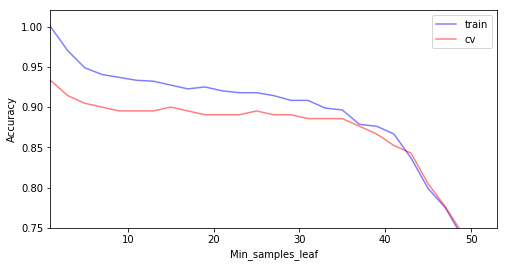

In [41]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.75,1.02])
ax.set_xlim([1,53])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf")

Данная иллюстрация показывает, что несмотря на незначительную потерю в точности на валидации, увеличивая min_samples_leaf примерно до трех, мы можем снизить переобучаемость дерева (на тренировочных данных с 1.00 до 0.96) без значительной потери в точности на валидации.

#### Найдем подходящее значение max_depth (максимальной глубины дерева)

Max_depth: 2, accuracy score: 0.8667
Max_depth: 3, accuracy score: 0.8810
Max_depth: 4, accuracy score: 0.8905
Max_depth: 5, accuracy score: 0.8810
Max_depth: 6, accuracy score: 0.8762
Max_depth: 7, accuracy score: 0.8857
Max_depth: 8, accuracy score: 0.8857
Max_depth: 9, accuracy score: 0.8857
Max_depth: 10, accuracy score: 0.8857
Max_depth: 11, accuracy score: 0.8857
Max_depth: 12, accuracy score: 0.8857
Max_depth: 13, accuracy score: 0.8857
Max_depth: 14, accuracy score: 0.8857
Max_depth: 15, accuracy score: 0.8857
Max_depth: 16, accuracy score: 0.8857
Max_depth: 17, accuracy score: 0.8857
Max_depth: 18, accuracy score: 0.8857
Max_depth: 19, accuracy score: 0.8857
Max_depth: 20, accuracy score: 0.8857


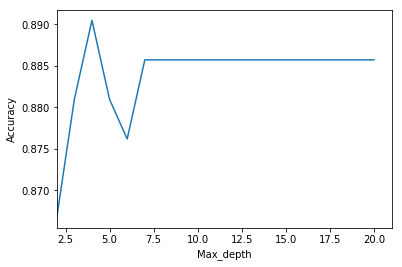

In [37]:
md = range(2,21)
scoring = []
for max_depth in md:
    rfc = RandomForestClassifier(n_estimators=50, max_depth=max_depth, random_state=random_state)
    score = cross_val_score(rfc, X, y, cv=5, n_jobs=-1)
    scoring.append(score.mean())
    print('Max_depth: {}, accuracy score: {:.4f}'.format(max_depth, score.mean()))

plt.plot(md, scoring)
plt.xlabel("Max_depth")
plt.xlim((2,21))
plt.ylabel("Accuracy")

Оптимальная глубина дерева - 4

#### Найдем оптимальное количество деревьев для Случайного Леса

N_estimators: 10, accuracy score: 0.9095
N_estimators: 20, accuracy score: 0.9143
N_estimators: 30, accuracy score: 0.9095
N_estimators: 40, accuracy score: 0.8905
N_estimators: 50, accuracy score: 0.8857
N_estimators: 60, accuracy score: 0.8810
N_estimators: 70, accuracy score: 0.8857
N_estimators: 80, accuracy score: 0.8810
N_estimators: 90, accuracy score: 0.8857
N_estimators: 100, accuracy score: 0.8857
N_estimators: 110, accuracy score: 0.8857
N_estimators: 120, accuracy score: 0.8857
N_estimators: 130, accuracy score: 0.8857
N_estimators: 140, accuracy score: 0.8857
N_estimators: 150, accuracy score: 0.8857


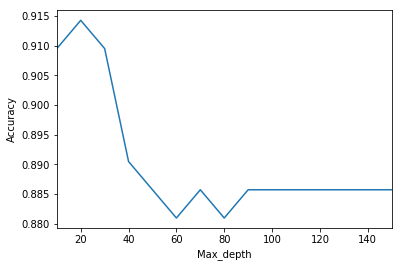

In [38]:
n_trees = range(10,160,10)
scoring = []
for n_estimators in n_trees:
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    score = cross_val_score(rfc, X, y, cv=5, n_jobs=-1)
    scoring.append(score.mean())
    print('N_estimators: {}, accuracy score: {:.4f}'.format(n_estimators, score.mean()))

plt.plot(n_trees, scoring)
plt.xlabel("Max_depth")
plt.xlim((10,150))
plt.ylabel("Accuracy")

Оптимальное значение n_estimators = 20

In [57]:
# Оценим классификатор с настроенными параметрами (полученые оптимальные при эксперементах)
rfc = RandomForestClassifier(n_estimators=20, max_depth=4, 
                             min_samples_leaf=5, max_features=5,
                             random_state=random_state)
score = cross_val_score(rfc, X, y, cv=5, n_jobs=-1)
score.mean()

0.90476190476190477

In [47]:
# а вот изменили только max_features
rfc = RandomForestClassifier(n_estimators=20,
                             max_features=5,
                             random_state=random_state)
score = cross_val_score(rfc, X, y, cv=5, n_jobs=-1)
score.mean()

0.93333333333333335

#### Сведем все воедино

In [92]:
# инициализируем параметры по которым осуществим перебор
parameters = {'max_features': mf,
              'min_samples_leaf': min_samples_leaf_grid,
              'max_depth': md}
rfc = RandomForestClassifier(n_estimators=20,random_state=random_state, n_jobs=-1)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=5, verbose=1)
gcv.fit(X,y)

Fitting 5 folds for each of 3078 candidates, totalling 15390 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 11242 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 12792 tasks      | elapsed: 17

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=-1, oob_score=False, random_state=11,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': range(2, 8), 'min_samples_leaf': range(1, 55, 2), 'max_depth': range(2, 21)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [99]:
gcv.best_estimator_, gcv.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=5, max_features=5, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=20, n_jobs=-1, oob_score=False, random_state=11,
             verbose=0, warm_start=False), 0.93333333333333335)

### Градиентный бустинг

#### Постоим модель с параметрами по умолчанию и фиксированным значениемколичества деревьев

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
gbc = GradientBoostingClassifier(n_estimators=50,random_state=random_state)

In [18]:
score = cross_val_score(gbc, X, y, cv=5, n_jobs=-1)
score.mean()

0.91904761904761911

С параметрами по умолчанию использование градиентного бустинга позволяет достигнуть точности около 0.92. Сходное значение для Случайного Леса.

#### Настроим параметры max_features

Max features: 2, accuracy score: 0.90
Max features: 3, accuracy score: 0.91
Max features: 4, accuracy score: 0.91
Max features: 5, accuracy score: 0.90
Max features: 6, accuracy score: 0.91
Max features: 7, accuracy score: 0.92


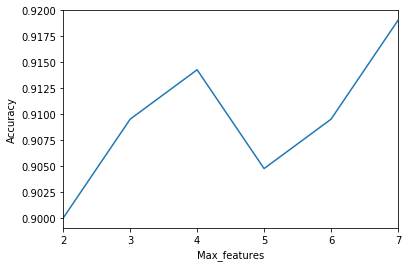

In [19]:
mf = range(2,8)
scoring = []
for max_features in mf:
    gbc = GradientBoostingClassifier(n_estimators=50,max_features=max_features, random_state=random_state)
    score = cross_val_score(gbc, X, y, cv=5, n_jobs=-1)
    scoring.append(score.mean())
    print('Max features: {}, accuracy score: {:.2f}'.format(max_features, score.mean()))

plt.plot(mf, scoring)
plt.xlabel("Max_features")
plt.xlim((2,7))
plt.ylabel("Accuracy")

Оптимальное количество признаков - 7

#### Проверяем оптималььное значение для аргумента min_samples_leaf (минимальное количество сэмплов необходимое для создания листа-узла) в сочетании с различными значениями min_samples_split (минимальное число сэмплов необходимое для расщепления узла)

In [20]:
min_samples_leaf_grid = range(1,27,2)
for min_samples_leaf in min_samples_leaf_grid:
    min_samples_split_grid = range(min_samples_leaf+1,30,2)
    for min_samples_split in min_samples_split_grid:
        gbc = GradientBoostingClassifier(n_estimators=50,
                                         min_samples_leaf=min_samples_leaf,
                                         min_samples_split=min_samples_split,
                                         random_state=random_state)
        score = cross_val_score(gbc, X, y, cv=5, n_jobs=-1)
        print("Min_samples_leaf: {}, min_samples_split: {}, Accuracy: {:.2f}".format(
                                         min_samples_leaf,
                                         min_samples_split,
                                         score.mean()))


Min_samples_leaf: 1, min_samples_split: 2, Accuracy: 0.92
Min_samples_leaf: 1, min_samples_split: 4, Accuracy: 0.91
Min_samples_leaf: 1, min_samples_split: 6, Accuracy: 0.91
Min_samples_leaf: 1, min_samples_split: 8, Accuracy: 0.90
Min_samples_leaf: 1, min_samples_split: 10, Accuracy: 0.91
Min_samples_leaf: 1, min_samples_split: 12, Accuracy: 0.91
Min_samples_leaf: 1, min_samples_split: 14, Accuracy: 0.92
Min_samples_leaf: 1, min_samples_split: 16, Accuracy: 0.91
Min_samples_leaf: 1, min_samples_split: 18, Accuracy: 0.91
Min_samples_leaf: 1, min_samples_split: 20, Accuracy: 0.90
Min_samples_leaf: 1, min_samples_split: 22, Accuracy: 0.91
Min_samples_leaf: 1, min_samples_split: 24, Accuracy: 0.90
Min_samples_leaf: 1, min_samples_split: 26, Accuracy: 0.92
Min_samples_leaf: 1, min_samples_split: 28, Accuracy: 0.92
Min_samples_leaf: 3, min_samples_split: 4, Accuracy: 0.90
Min_samples_leaf: 3, min_samples_split: 6, Accuracy: 0.90
Min_samples_leaf: 3, min_samples_split: 8, Accuracy: 0.91
Min_

Наилучший результат получен при минимальных значениях min_samples_leaf

In [23]:
# инициализируем генератор стратифицированной разбивки датасета для валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

In [28]:
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = range(1,55,2)

# Обучаем на тренировочном датасете
for min_samples_leaf in min_samples_leaf_grid:
    gbc = GradientBoostingClassifier(n_estimators=50, random_state=random_state,
                                 min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        gbc.fit(X_train, y_train)
        temp_train_acc.append(gbc.score(X_train, y_train))
        temp_test_acc.append(gbc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)

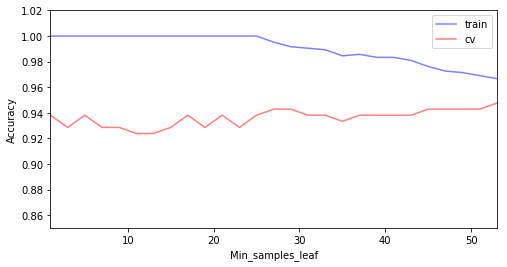

In [31]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.85,1.02])
ax.set_xlim([1,53])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf")

При сравнении точности на обучающей выборки и на валидации видим, что точность на обучающей при всех значениях Min_samples_leaf достигает единицы (переобучение?) и начинает снижаться только после значения Min_samples_leaf около 25. В свою очередь точность на валидации после этих значений Min_samples_leaf растет. Возможно, имеет смысл использовать значение Min_samples_leaf около 40, чтобы модель лучше генерализовала на новых данных.

#### Найдем подходящее значение max_depth (максимальной глубины дерева)


Max_depth: 2, accuracy score: 0.93
Max_depth: 3, accuracy score: 0.92
Max_depth: 4, accuracy score: 0.90
Max_depth: 5, accuracy score: 0.90
Max_depth: 6, accuracy score: 0.89
Max_depth: 7, accuracy score: 0.88
Max_depth: 8, accuracy score: 0.88
Max_depth: 9, accuracy score: 0.88
Max_depth: 10, accuracy score: 0.88
Max_depth: 11, accuracy score: 0.88
Max_depth: 12, accuracy score: 0.88
Max_depth: 13, accuracy score: 0.88
Max_depth: 14, accuracy score: 0.88
Max_depth: 15, accuracy score: 0.88
Max_depth: 16, accuracy score: 0.88
Max_depth: 17, accuracy score: 0.88
Max_depth: 18, accuracy score: 0.88
Max_depth: 19, accuracy score: 0.88
Max_depth: 20, accuracy score: 0.88


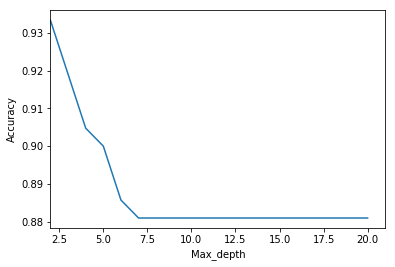

In [33]:
md = range(2,21)
scoring = []
for max_depth in md:
    gbc = GradientBoostingClassifier(n_estimators=50, max_depth=max_depth, random_state=random_state)
    score = cross_val_score(gbc, X, y, cv=5, n_jobs=-1)
    scoring.append(score.mean())
    print('Max_depth: {}, accuracy score: {:.2f}'.format(max_depth, score.mean()))

plt.plot(md, scoring)
plt.xlabel("Max_depth")
plt.xlim((2,21))
plt.ylabel("Accuracy")

Подтверждаем теорию и видим, что лучший результат достигается на неглубоких деревьях.

#### Найдем оптимальное количество деревьев для Градиентного Бустинга

N_estimators: 10, accuracy score: 0.9000
N_estimators: 20, accuracy score: 0.9048
N_estimators: 30, accuracy score: 0.9238
N_estimators: 40, accuracy score: 0.9238
N_estimators: 50, accuracy score: 0.9190
N_estimators: 60, accuracy score: 0.9095
N_estimators: 70, accuracy score: 0.9095
N_estimators: 80, accuracy score: 0.9095
N_estimators: 90, accuracy score: 0.9095
N_estimators: 100, accuracy score: 0.9095
N_estimators: 110, accuracy score: 0.9143
N_estimators: 120, accuracy score: 0.9143
N_estimators: 130, accuracy score: 0.9143
N_estimators: 140, accuracy score: 0.9143
N_estimators: 150, accuracy score: 0.9143


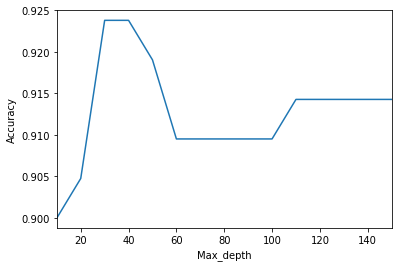

In [35]:
n_trees = range(10,160,10)
scoring = []
for n_estimators in n_trees:
    gbc = GradientBoostingClassifier(n_estimators=n_estimators, random_state=random_state)
    score = cross_val_score(gbc, X, y, cv=5, n_jobs=-1)
    scoring.append(score.mean())
    print('N_estimators: {}, accuracy score: {:.4f}'.format(n_estimators, score.mean()))

plt.plot(n_trees, scoring)
plt.xlabel("Max_depth")
plt.xlim((10,150))
plt.ylabel("Accuracy")

Стоит использовать 40 деревьев


#### С оптимальными параметрами (все)

In [85]:
gbc = GradientBoostingClassifier(n_estimators=40,
                                 max_depth=2,
                                 min_samples_leaf=1,
                                 max_features=7,
                                 random_state=random_state)
score = cross_val_score(gbc, X, y, cv=5, n_jobs=-1)
score.mean()

0.9285714285714286

Все таки лучше с min_samples_leaf = 1

#### Важность признаков

In [101]:
features = {"f1":"Area", "f2":"Perimeter", "f3":"Compactness",
            "f4":"Kernel_length","f5":"Kernel_width",
            "f6":"Assimetry", "f7":"Groove_length"}
gbc = GradientBoostingClassifier(n_estimators=40,
                                 max_depth=2,
                                 min_samples_leaf=1,
                                 max_features=7,
                                 random_state=random_state)
gbc.fit(X,y)
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

Feature ranking:
1. Area 0.389974 
2. Groove_length 0.323624 
3. Perimeter 0.142786 
4. Assimetry 0.079087 
5. Kernel_length 0.033251 
6. Compactness 0.017693 
7. Kernel_width 0.013585 


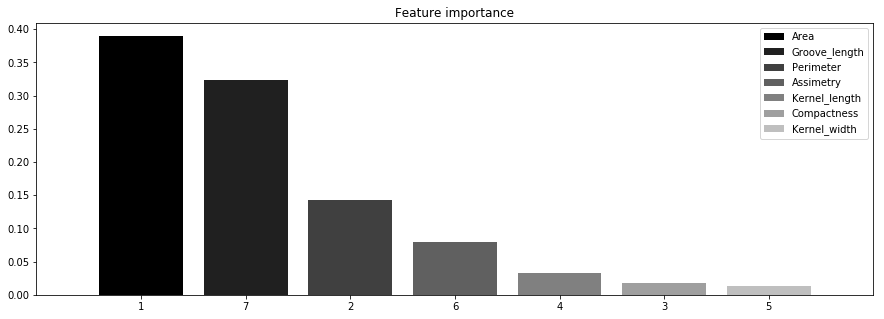

In [102]:
# Plot the feature importancies of the forest
num_to_plot = 7
feature_indices = [ind+1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")
  
for f in range(num_to_plot):
    print("%d. %s %f " % (f + 1, 
            features["f"+str(feature_indices[f])], 
            importances[indices[f]]))
plt.figure(figsize=(15,5))
plt.title("Feature importance")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
       color=([str(i/float(num_to_plot+1)) 
               for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) 
                  for i in feature_indices]);

#### Отдельное дерево = 0.914, Градиентный Бустинг = 0.928, Случайный лес = 0.933, Логистическая регрессия = 0.957

#### Выводы
Учитывая высокую слонность деревьев решений к переобучению и соответственно худшей точности на тестовых или валидационных данных (плохо генерализуют) были предложены методы которые улучшают возможности деревьев решений. Мы рассмотрели RandomForest - который по существу является вариантом Bagging (Bootstrap Agregation). Данный метод снижает Variance и тем самым уменьшает переобучение, использую большое количество деревьев обучающихся на разных подвыборках основной выборки (созданных методом bootstrap). В RandomForest классификаторе для того чтобы еще уменьшить корреляцию между деревьями для каждого расщепления используется случайный набор признаков m из общего числа признаков n (m < n). Идея градиентного бустинга заключается в том, чтобы также использовать большое количесво деревьев. Но в качестве обучающих данных для следующего дерева подается данные + ошибка, допущенная на предыдущем. Таким образом каждому дереву достаются все данные и большее внимание они обращают на данные с большей ошибкой.

Исследуя наши данные мы получили результаты, которые в большей мере подтверждают теорию. Хотя Случайный Лес и оказался незначительно лучше Градиентного Бустинга, но все же точность относительно использования одного дерева решений была улучшена. 
При этом самым подходящим методом оказалась все же логистическая регрессия.